### Visualizing Earnings Based On College majors

#### In this project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations. 

#### We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data.

#### Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

    Rank - Rank by median earnings (the dataset is ordered by this column).
    Major_code - Major code.
    Major - Major description.
    Major_category - Category of major.
    Total - Total number of people with major.
    Sample_size - Sample size (unweighted) of full-time.
    Men - Male graduates.
    Women - Female graduates.
    ShareWomen - Women as share of total.
    Employed - Number employed.
    Median - Median salary of full-time, year-round workers.
    Low_wage_jobs - Number in low-wage service jobs.
    Full_time - Number employed 35 hours or more.
    Part_time - Number employed less than 35 hours.

#### Using visualizations, we can start to explore questions from the dataset like:
 - Do students in more popular majors make more money?
 - How many majors are predominantly male? Predominantly female?
 - Which category of majors have the most students?
 
#### We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.


In [1]:
# Import pandas and matplotlib into the environment.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the dataset into a DataFrame and start exploring the data
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


#### Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [8]:
raw_data_count = recent_grads.shape[0]
raw_data_count

173

In [10]:
# Use DataFrame.dropna() to drop rows containing missing values
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

#### Most of the plotting functionality in pandas is contained within the DataFrame.plot() method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the kind parameter to specify the type of plot we want. We use x and y to specify the data we want on each axis.

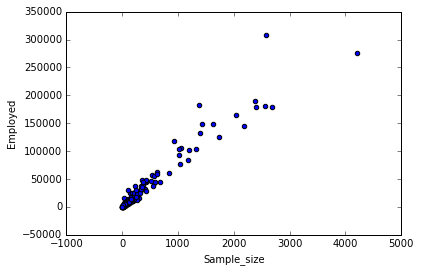

In [11]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')

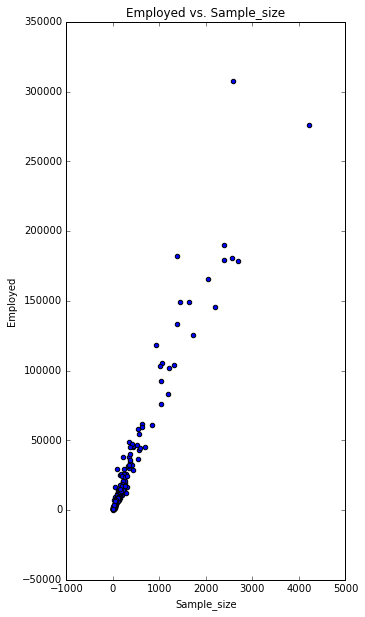

In [12]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,10))

#### We can access the underlying matplotlib Axes object by assigning the return value to a variable

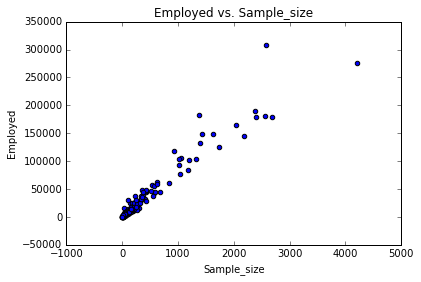

In [13]:
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')

#### Sample_size and Median

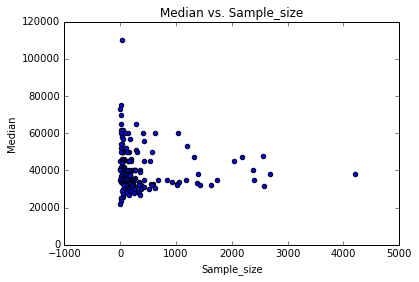

In [16]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size')

#### Sample_size and Unemployment_rate

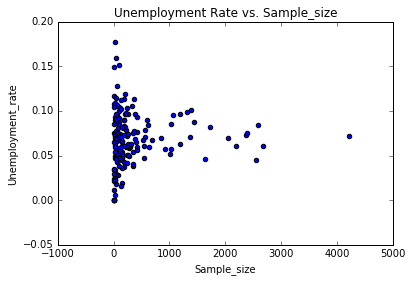

In [17]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployment Rate vs. Sample_size')

#### Full_time and Median

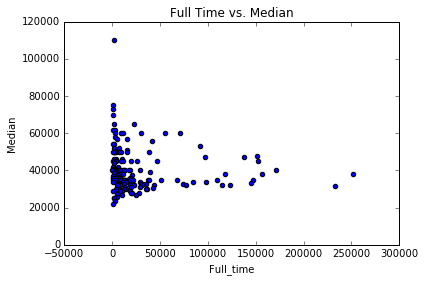

In [18]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full Time vs. Median')

#### ShareWomen and Unemployment_rate

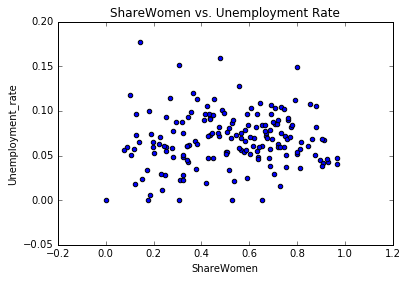

In [19]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen vs. Unemployment Rate')

#### Men and Median

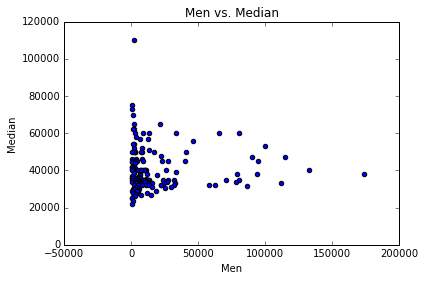

In [20]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs. Median')

#### Women and Median

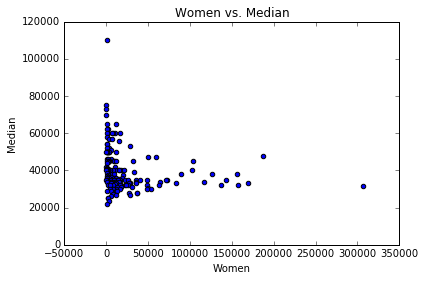

In [21]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs. Median')

#### Use the plots to explore the following questions:
 - Do students in more popular majors make more money?
        No, from the sample_size vs median figure, we can not observe any strong correlation.
 - Do students that majored in subjects that were majority female make more money?
        No, from women vs median, no strong correlation
 - Is there any link between the number of full-time employees and median salary?
        No

#### To explore the distribution of values in a column, we can select it from the DataFrame, call Series.plot(), and set the kind parameter to hist

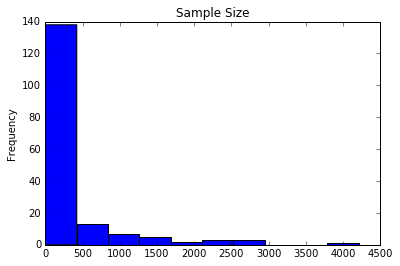

In [27]:
ax = recent_grads['Sample_size'].plot(kind='hist')
ax.set_title('Sample Size')

#### The DataFrame.plot() and Series.plot() methods have many of the same parameters but are used for different use cases. We use Series.plot() to plot a specific column and DataFrame.plot() to generate plots that use values from multiple columns. For example, because scatter plots are generated using 2 sets of values (one for each axis), we can't create a scatter plot using Series.plot().

####  There is no way to control the binning strategy for histograms.But, we can control the binning strategy of a histogram using Series.hist(), which contains parameters specific to customizing histograms

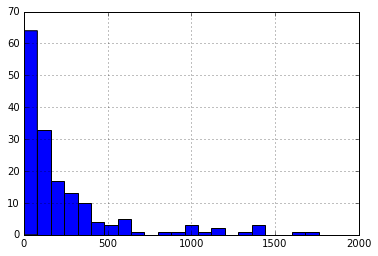

In [31]:
recent_grads['Sample_size'].hist(bins=25, range=(0,2000))

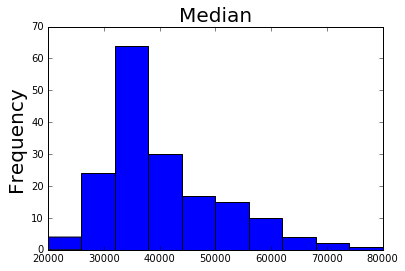

In [37]:
# Generate histograms in separate jupyter notebook cells to explore the distributions columns
fig, ax = plt.subplots()
ax.hist(recent_grads['Median'], range = (20000, 80000))
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_title('Median', fontsize = 20)

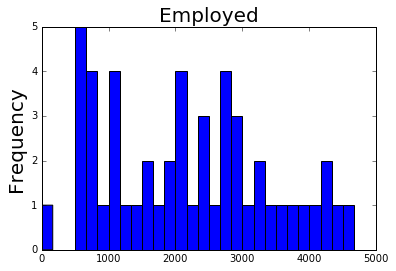

In [42]:
fig, ax = plt.subplots()
ax.hist(recent_grads['Employed'], range = (0, 5000), bins = 30)
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_title('Employed', fontsize = 20)

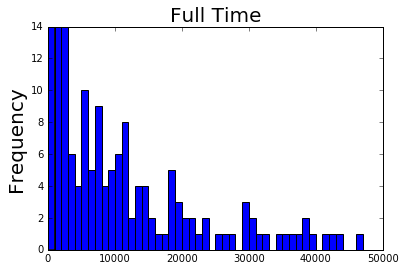

In [45]:
fig, ax = plt.subplots()
ax.hist(recent_grads['Full_time'], range = (0, 50000), bins = 50)
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_title('Full Time', fontsize = 20)

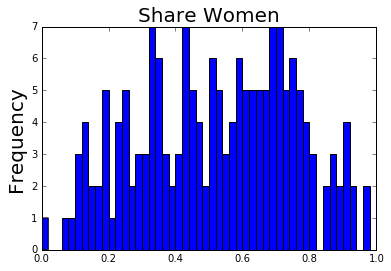

In [50]:
fig, ax = plt.subplots()
ax.hist(recent_grads['ShareWomen'], range = (0, 1), bins = 50)
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_title('Share Women', fontsize = 20)

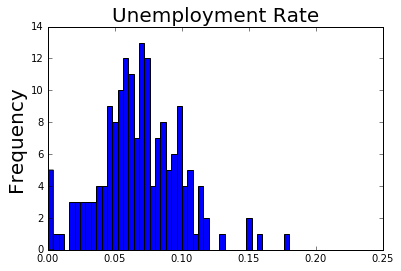

In [52]:
fig, ax = plt.subplots()
ax.hist(recent_grads['Unemployment_rate'], range = (0, 0.2), bins = 50)
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_title('Unemployment Rate', fontsize = 20)

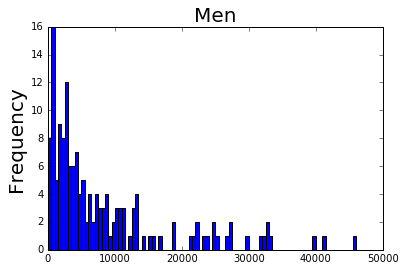

In [55]:
fig, ax = plt.subplots()
ax.hist(recent_grads['Men'], range = (0, 50000), bins = 100)
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_title('Men', fontsize = 20)

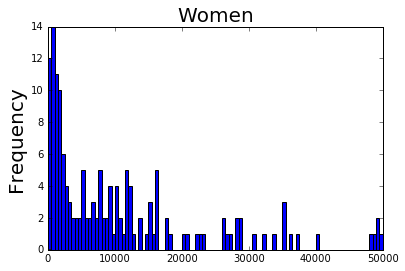

In [56]:
fig, ax = plt.subplots()
ax.hist(recent_grads['Women'], range = (0, 50000), bins = 100)
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_title('Women', fontsize = 20)

#### Use the plots to explore the following questions:
 - What percent of majors are predominantly male? Predominantly female?
 - What's the most common median salary range?

In [62]:
# Major with most female 
recent_grads.loc[recent_grads['ShareWomen'] > 0.8, 'Major'].head()

34                                      NURSING
51                   MEDICAL ASSISTING SERVICES
55                    SCHOOL STUDENT COUNSELING
88     MISCELLANEOUS HEALTH MEDICAL PROFESSIONS
100                     SPECIAL NEEDS EDUCATION
Name: Major, dtype: object

In [63]:
# Major with most male 
recent_grads.loc[recent_grads['ShareWomen'] < 0.2, 'Major'].head()

0                        PETROLEUM ENGINEERING
1               MINING AND MINERAL ENGINEERING
2                    METALLURGICAL ENGINEERING
3    NAVAL ARCHITECTURE AND MARINE ENGINEERING
5                          NUCLEAR ENGINEERING
Name: Major, dtype: object

In [64]:
# most common median salary range
recent_grads['Median'].describe()

count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64

#### A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

#### Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named scatter_matrix() that generates the plots for us. This function is part of the pandas.plotting module and needs to be imported separately. To generate a scatter matrix plot for 2 columns, select just those 2 columns and pass the resulting DataFrame into the scatter_matrix() function.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0b36c1b70>,
      dtype=object)

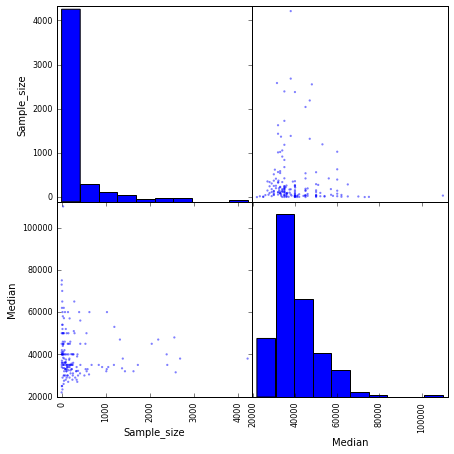

In [69]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(7,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0b34ee1d0>,
      dtype=object)

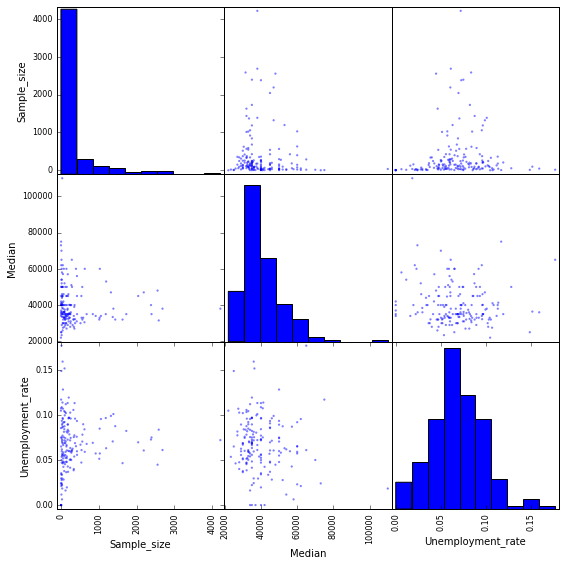

In [70]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(9,9))

#### To create bar plots in matplotlib, we had to specify many aspects of the bar plot ourselves. We had to specify the locations, labels, lengths, and widths of the bars. When creating bar plots using pandas, we only need specify the data we want the bars to represent and the labels for each bar. 

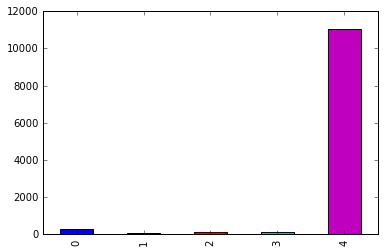

In [71]:
# a bar plot of the first 5 values in the Women column
recent_grads[:5]['Women'].plot(kind='bar')

#### By default, pandas will use the default labels on the x-axis for each bar (1 to n) from matplotlib. If we instead use the DataFrame.plot.bar() method, we can use the x parameter to specify the labels and the y parameter to specify the data for the bars

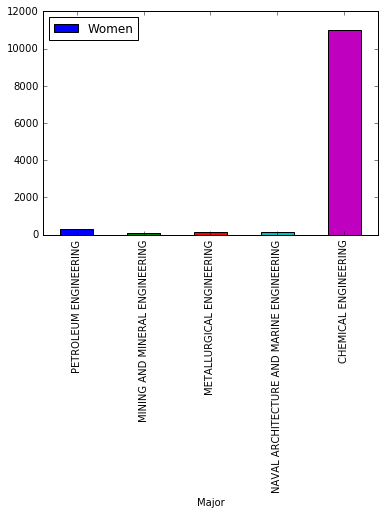

In [72]:
recent_grads[:5].plot.bar(x='Major', y='Women')

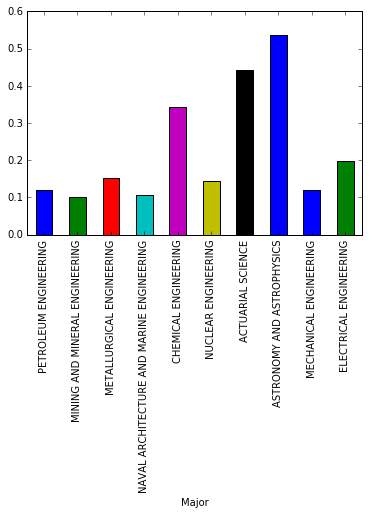

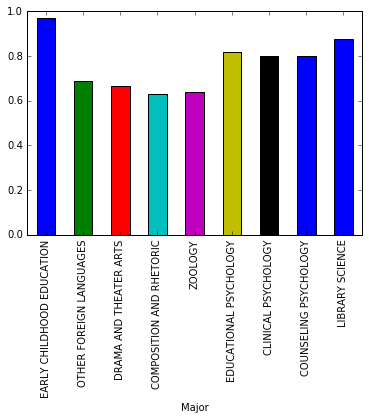

In [73]:
# bar plots to compare the percentages of women (ShareWomen) 
# from the first 10 rows and last 10 rows of a sorted dataframe.
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

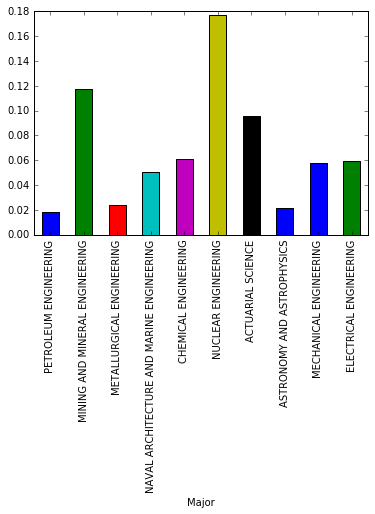

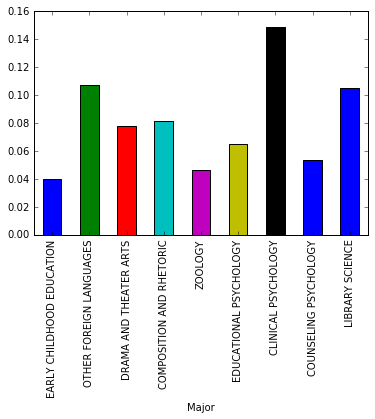

In [74]:
# bar plots to compare the unemployment rate (Unemployment_rate) 
# from the first 10 rows and last 10 rows of a sorted dataframe.
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)